In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.isna().sum() # no missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum() # no duplicates

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploring Data

In [10]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [11]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [13]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [14]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [15]:
# numerical and categorical features

nfeatures=[f for f in df.columns if df[f].dtype!='O']
cfeatures=[f for f in df.columns if df[f].dtype=='O']

In [16]:
nfeatures

['math score', 'reading score', 'writing score']

In [17]:
cfeatures

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [18]:
# adding columns for total score and average

df['total score']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full=df[df['reading score']==100]['average'].count()
writing_full=df[df['writing score']==100]['average'].count()
math_full=df[df['math score']==100]['average'].count()

# students who got full marks in reading or writing or maths
print(reading_full,writing_full,math_full)

17 14 7


In [21]:
reading_less_20=df[df['reading score']<=20]['average'].count()
writing_less_20=df[df['writing score']<=20]['average'].count()
math_less_20=df[df['math score']<=20]['average'].count()

print(reading_less_20,writing_less_20,math_less_20)

1 3 4


In [22]:
# Insights

# students have performed worst in maths
# students have performed well in reading section

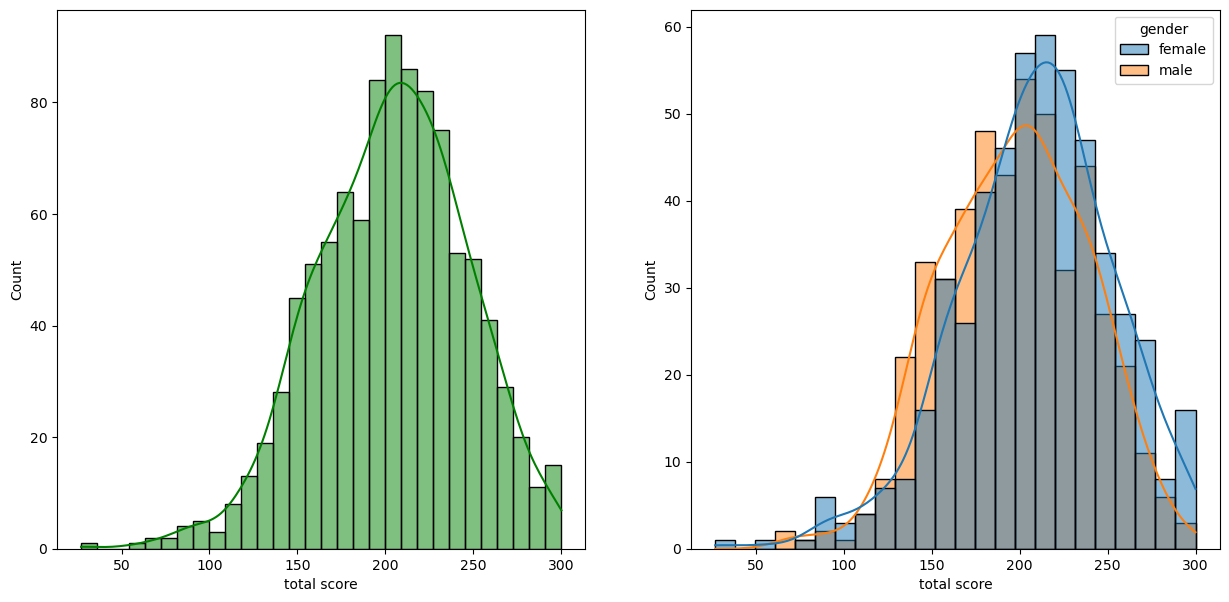

In [25]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

In [26]:
# female students are performing well than male students

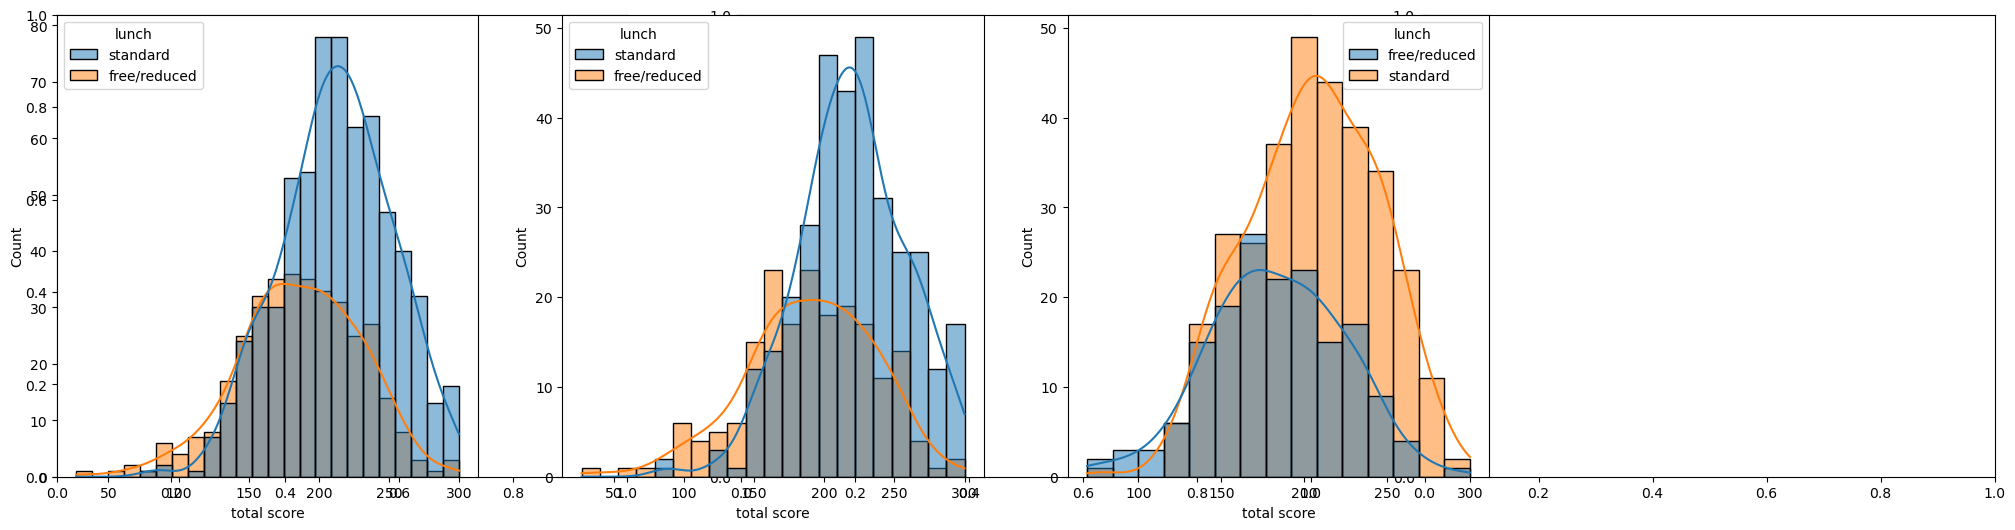

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='total score',kde=True,hue='lunch')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='total score',kde=True,hue='lunch')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='total score',kde=True,hue='lunch')

plt.show()

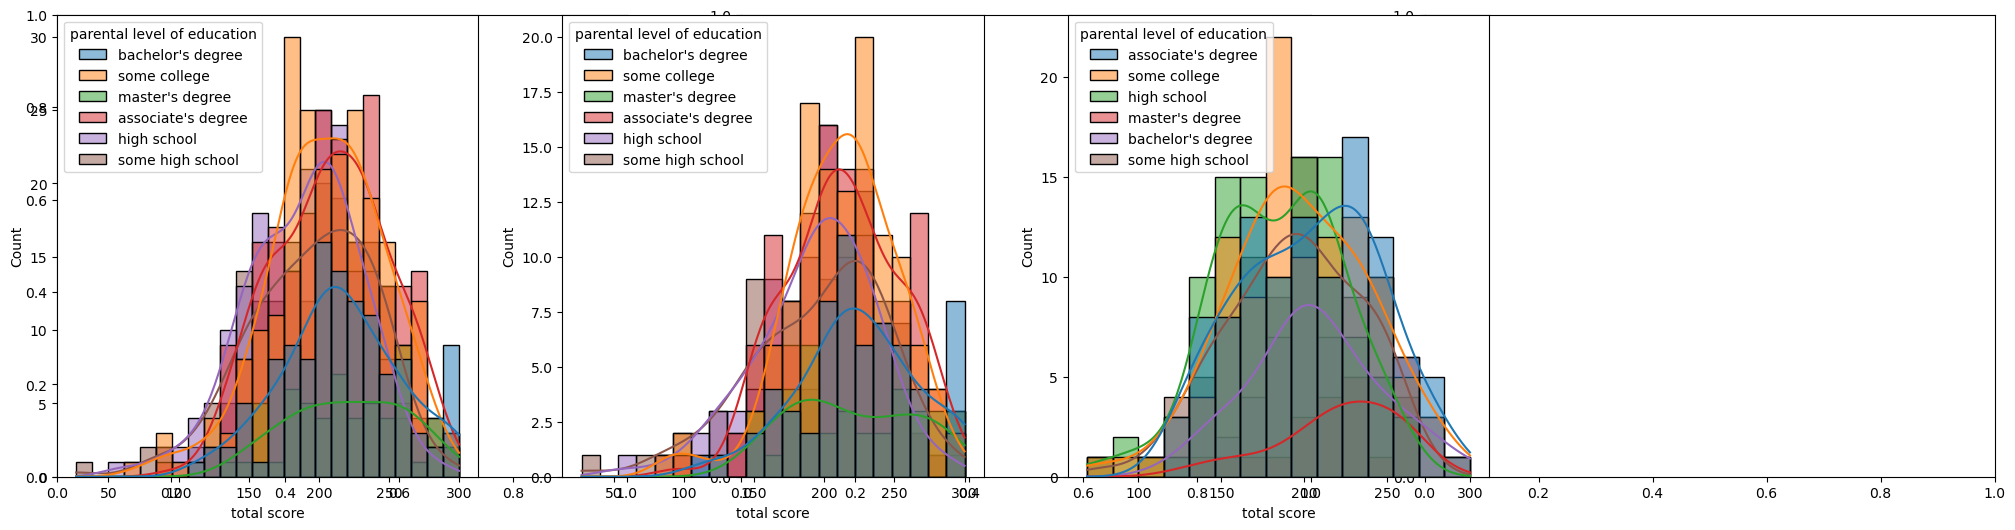

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='total score',kde=True,hue='parental level of education')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='total score',kde=True,hue='parental level of education')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='total score',kde=True,hue='parental level of education')

plt.show()

In [29]:
# in general , parents level of education don't help their children education

# in male students case , they perform well when the parents level of education is associate's degree or master's degree
# in case of female students no affect of parents level of education

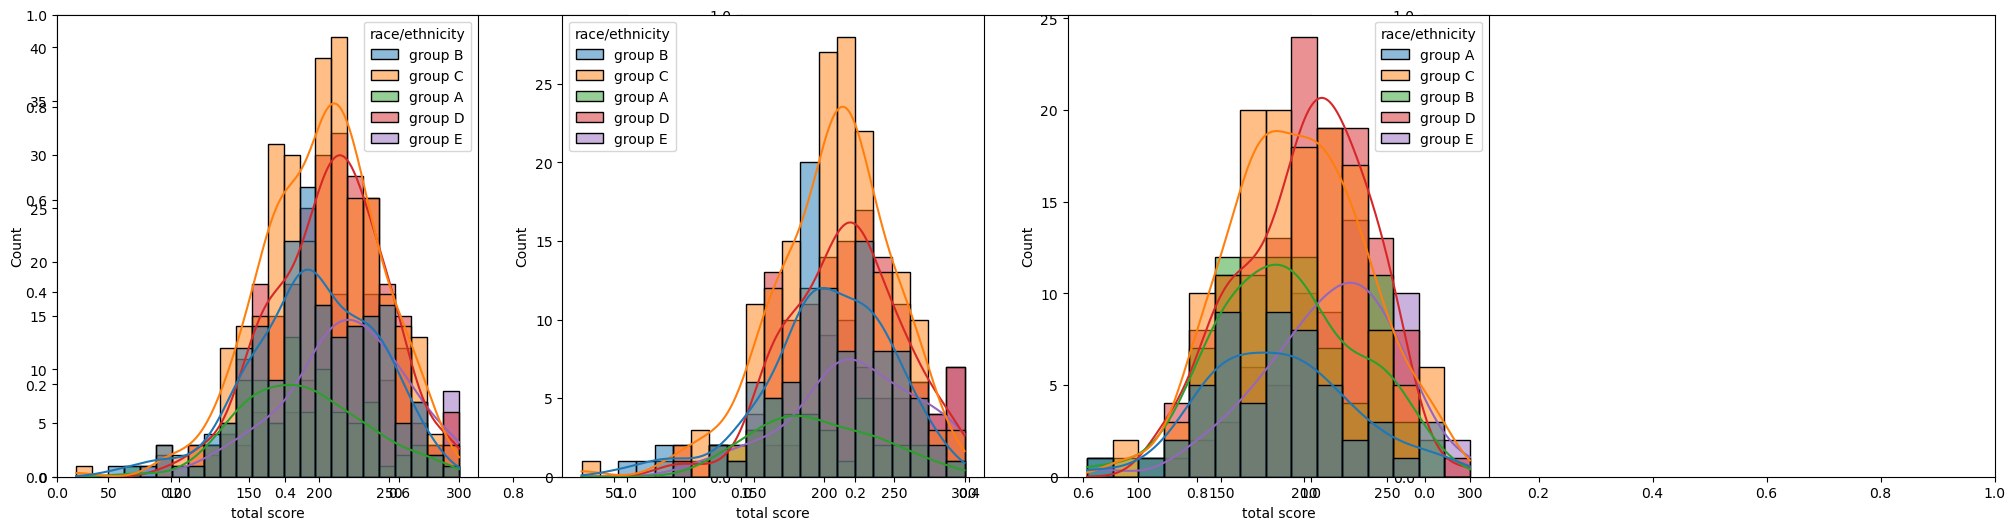

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,4,1)
sns.histplot(data=df,x='total score',kde=True,hue='race/ethnicity')
plt.subplot(1,4,2)
sns.histplot(data=df[df.gender=='female'],x='total score',kde=True,hue='race/ethnicity')
plt.subplot(1,4,3)
sns.histplot(data=df[df.gender=='male'],x='total score',kde=True,hue='race/ethnicity')

plt.show()

In [31]:
# students of group a and group b tend to perform poorly
# students of group a and group b tend to perform poorly irrespective of gender

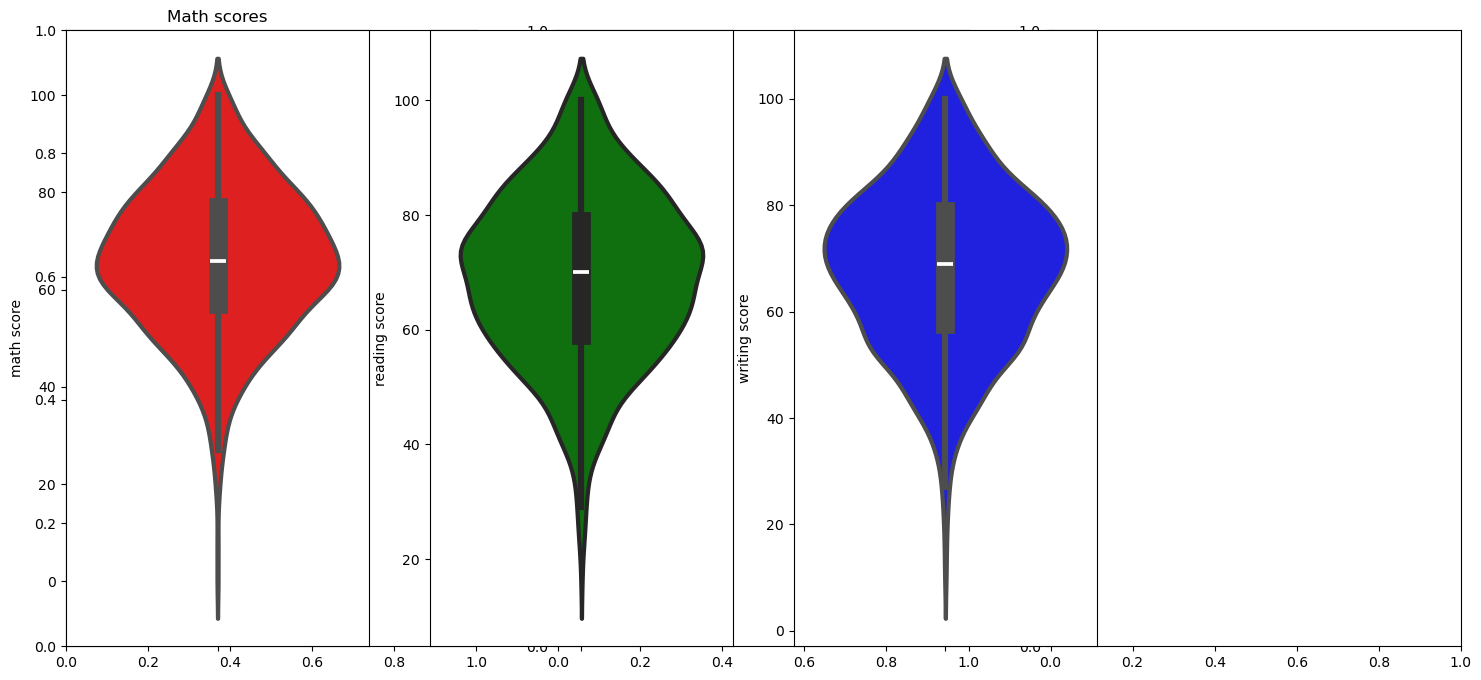

In [32]:
plt.subplots(1,3,figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math scores")
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)

plt.show()

In [33]:
# In maths most of the students score between 60-80
# In reading score and writing score its around 40-90

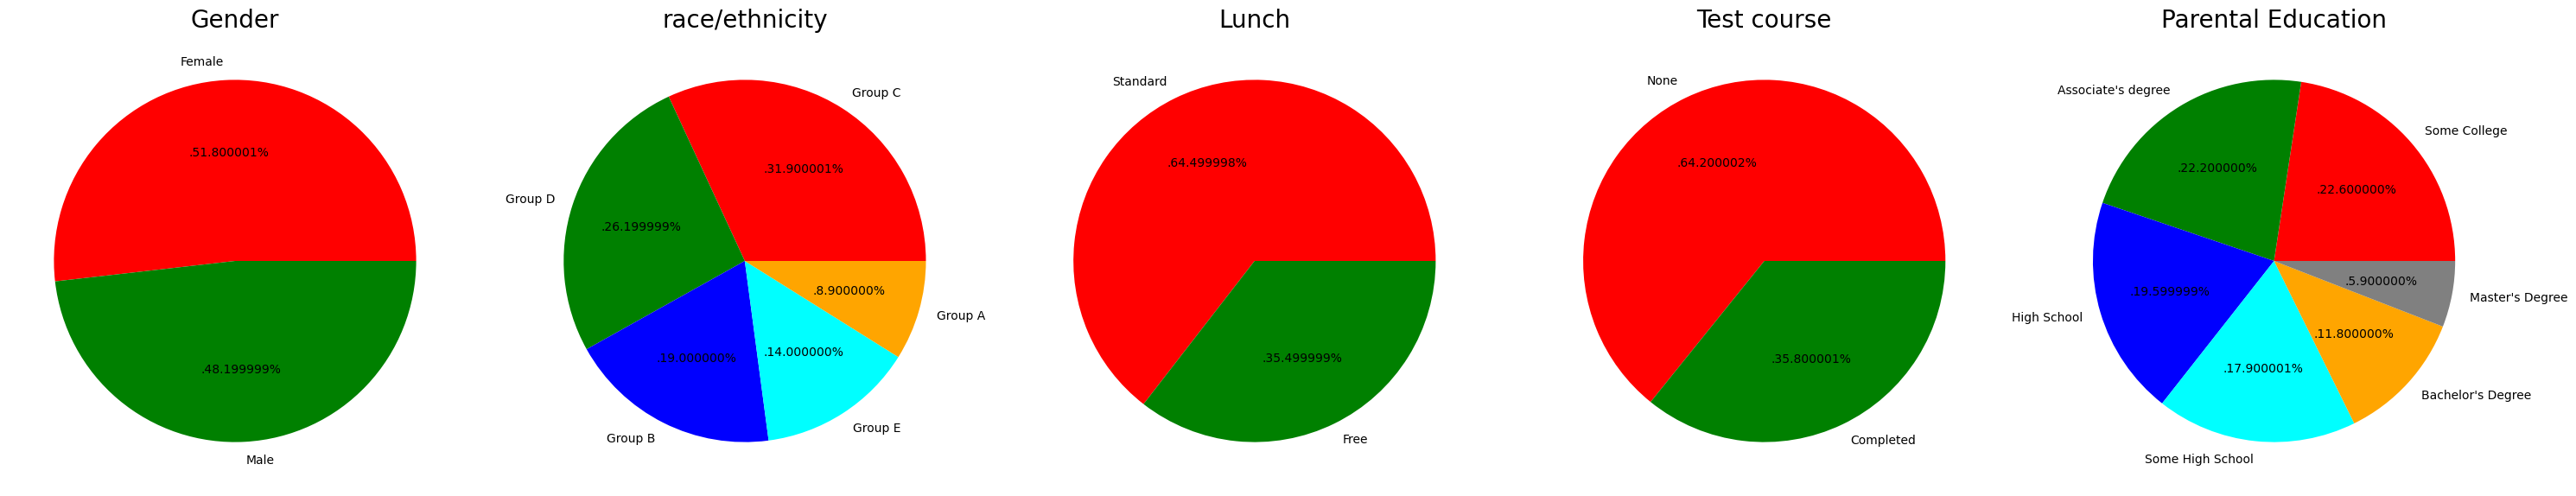

In [36]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']


plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race/ethnicity'].value_counts()
labels='Group C','Group D','Group B','Group E','Group A'
color=['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels='Standard','Free'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['test preparation course'].value_counts()
labels='None','Completed'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['parental level of education'].value_counts()
labels='Some College',"Associate's degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()



In [37]:
# number of male and female students are almost equal
# number of students are greatest in group c
# number of students who have standard lunch are greater
# number of students who have not enrolled in any test preparation course is greater
# number of students whose parental education is 'Some college' is greater followed closely by 'Associate's degree'


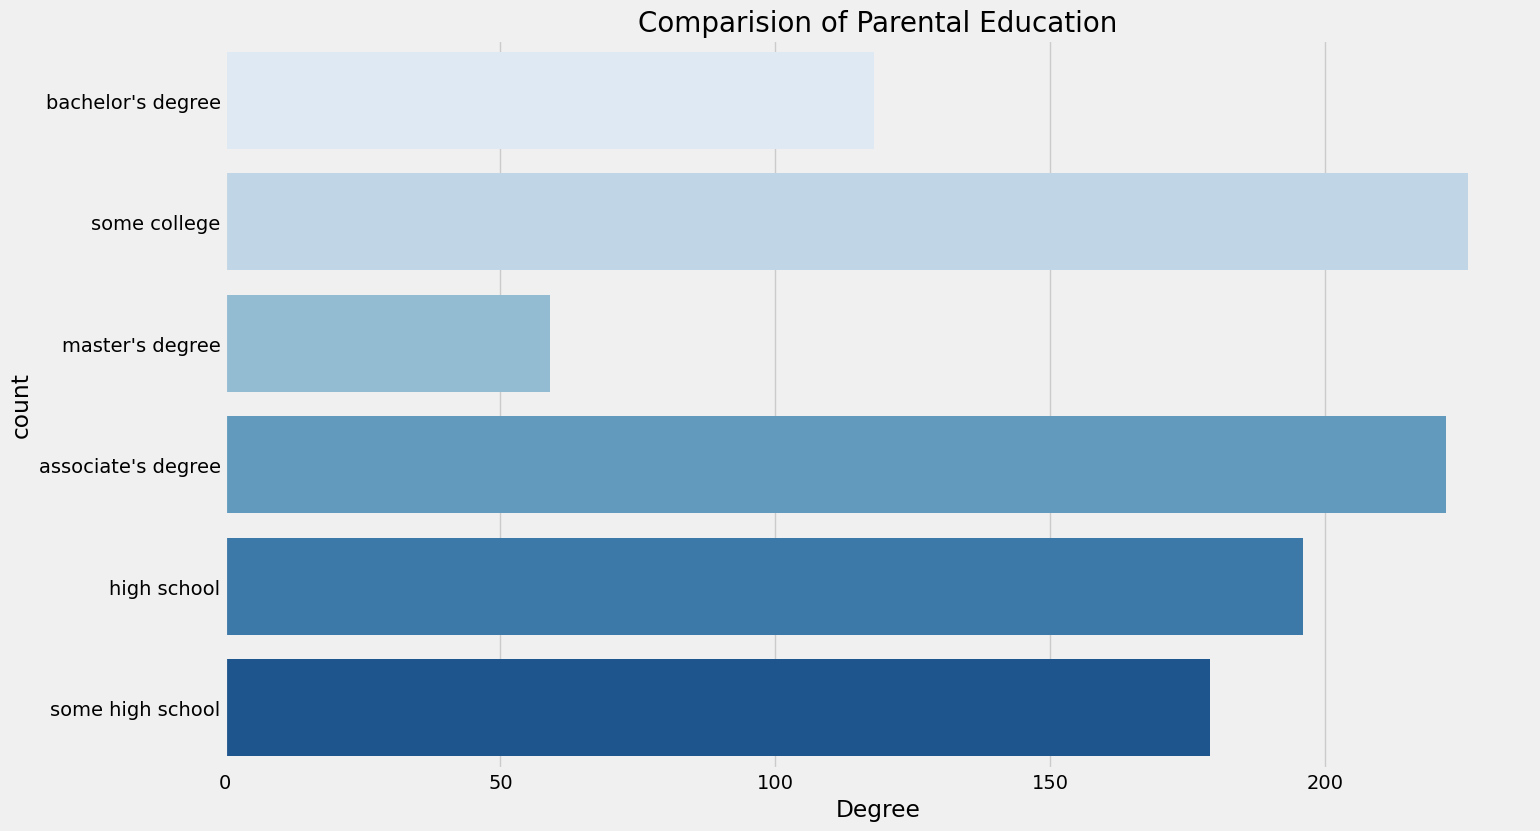

In [38]:
plt.rcParams['figure.figsize']=(15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Comparision of Parental Education',fontweight=30,fontsize=20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [39]:
# largest number of parents are from 'some college'

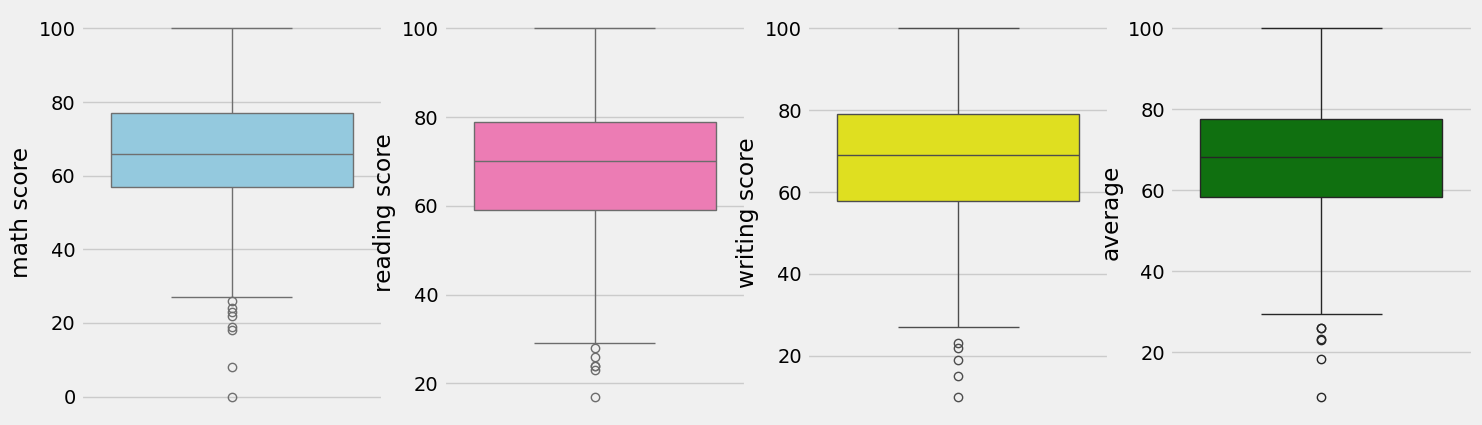

In [42]:
# checking outliers

plt.subplots(1,4,figsize=(16,5))
plt.subplot(1,4,1)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(1,4,2)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(1,4,3)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(1,4,4)
sns.boxplot(df['average'],color='green')
plt.show()


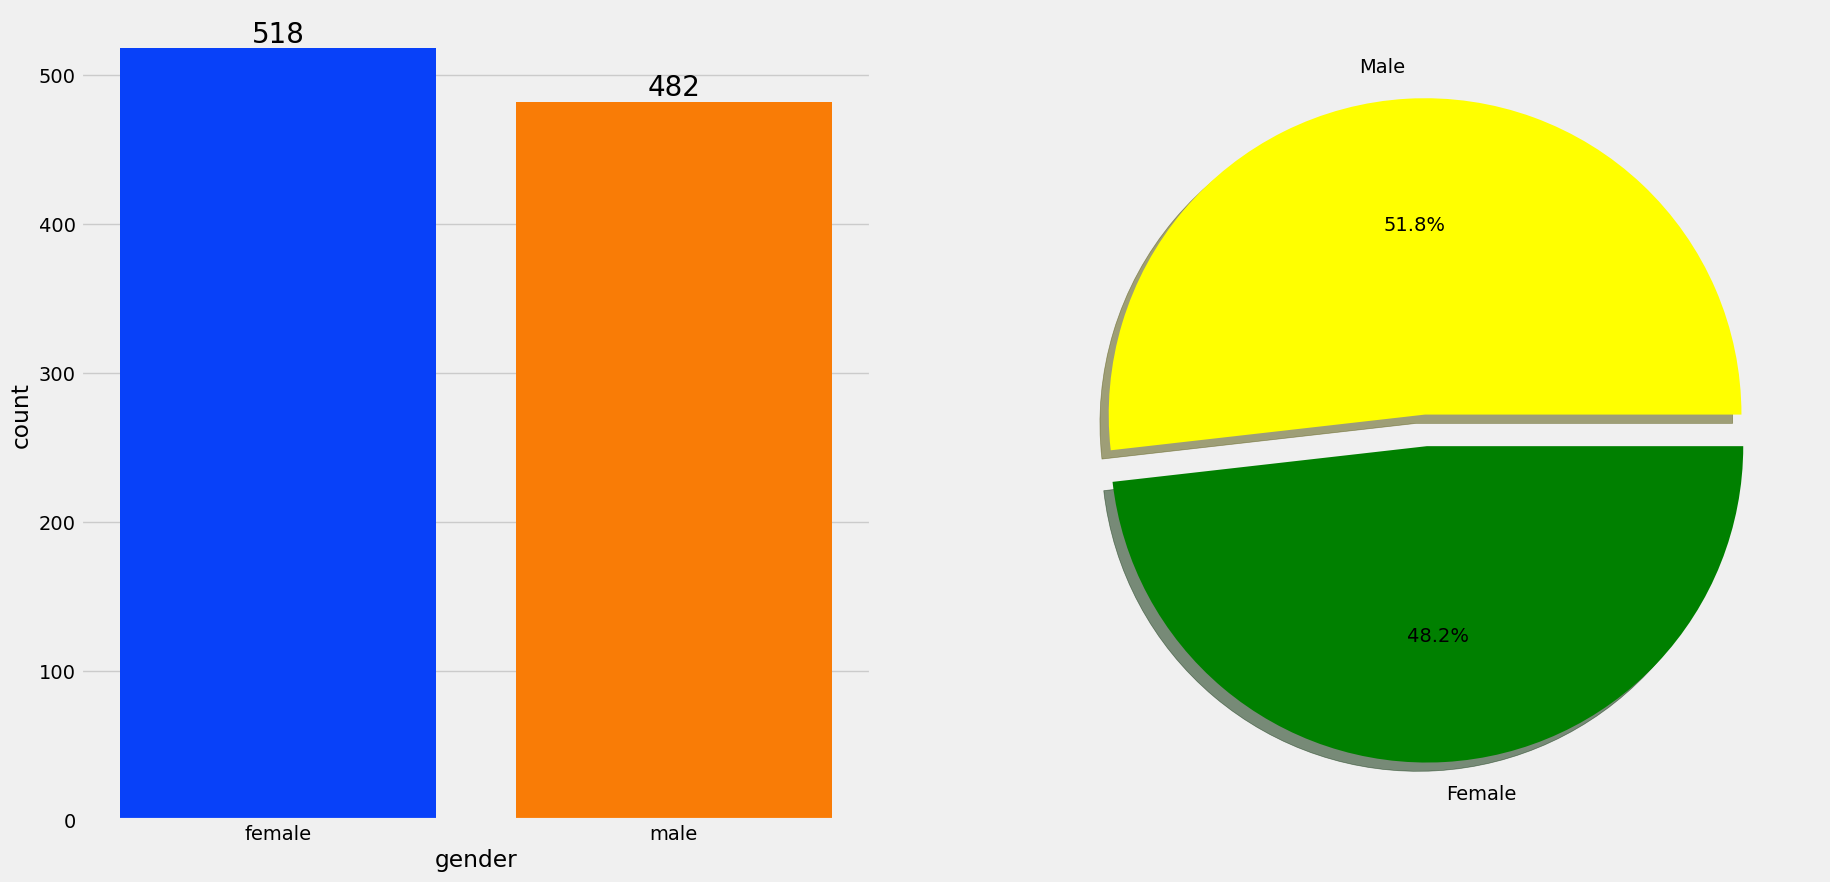

In [43]:
# Univariate analysis

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['yellow','green'])
plt.show()

In [44]:
# gender has balanced data with female students 518 (52%) and male students 482 (48%)

In [46]:
#bi variate analysis
# Group by 'gender' and calculate the mean for numeric columns
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)


        math score  reading score  writing score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


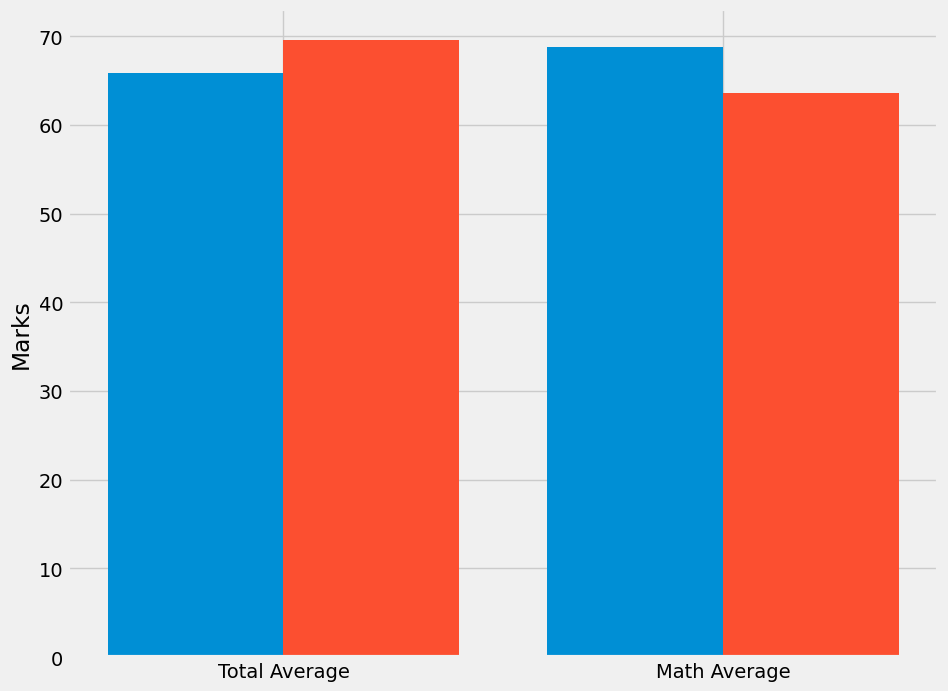

In [47]:
plt.figure(figsize=(10,8))

X=['Total Average','Math Average']

female_scores=[gender_group['average'][0],gender_group['math score'][0]]
male_scores=[gender_group['average'][1],gender_group['math score'][1]]

X_axis=np.arange(len(X))

plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")

plt.show()

In [48]:
# ON an average females have a better overall score than men
# whereas males have higher score in maths

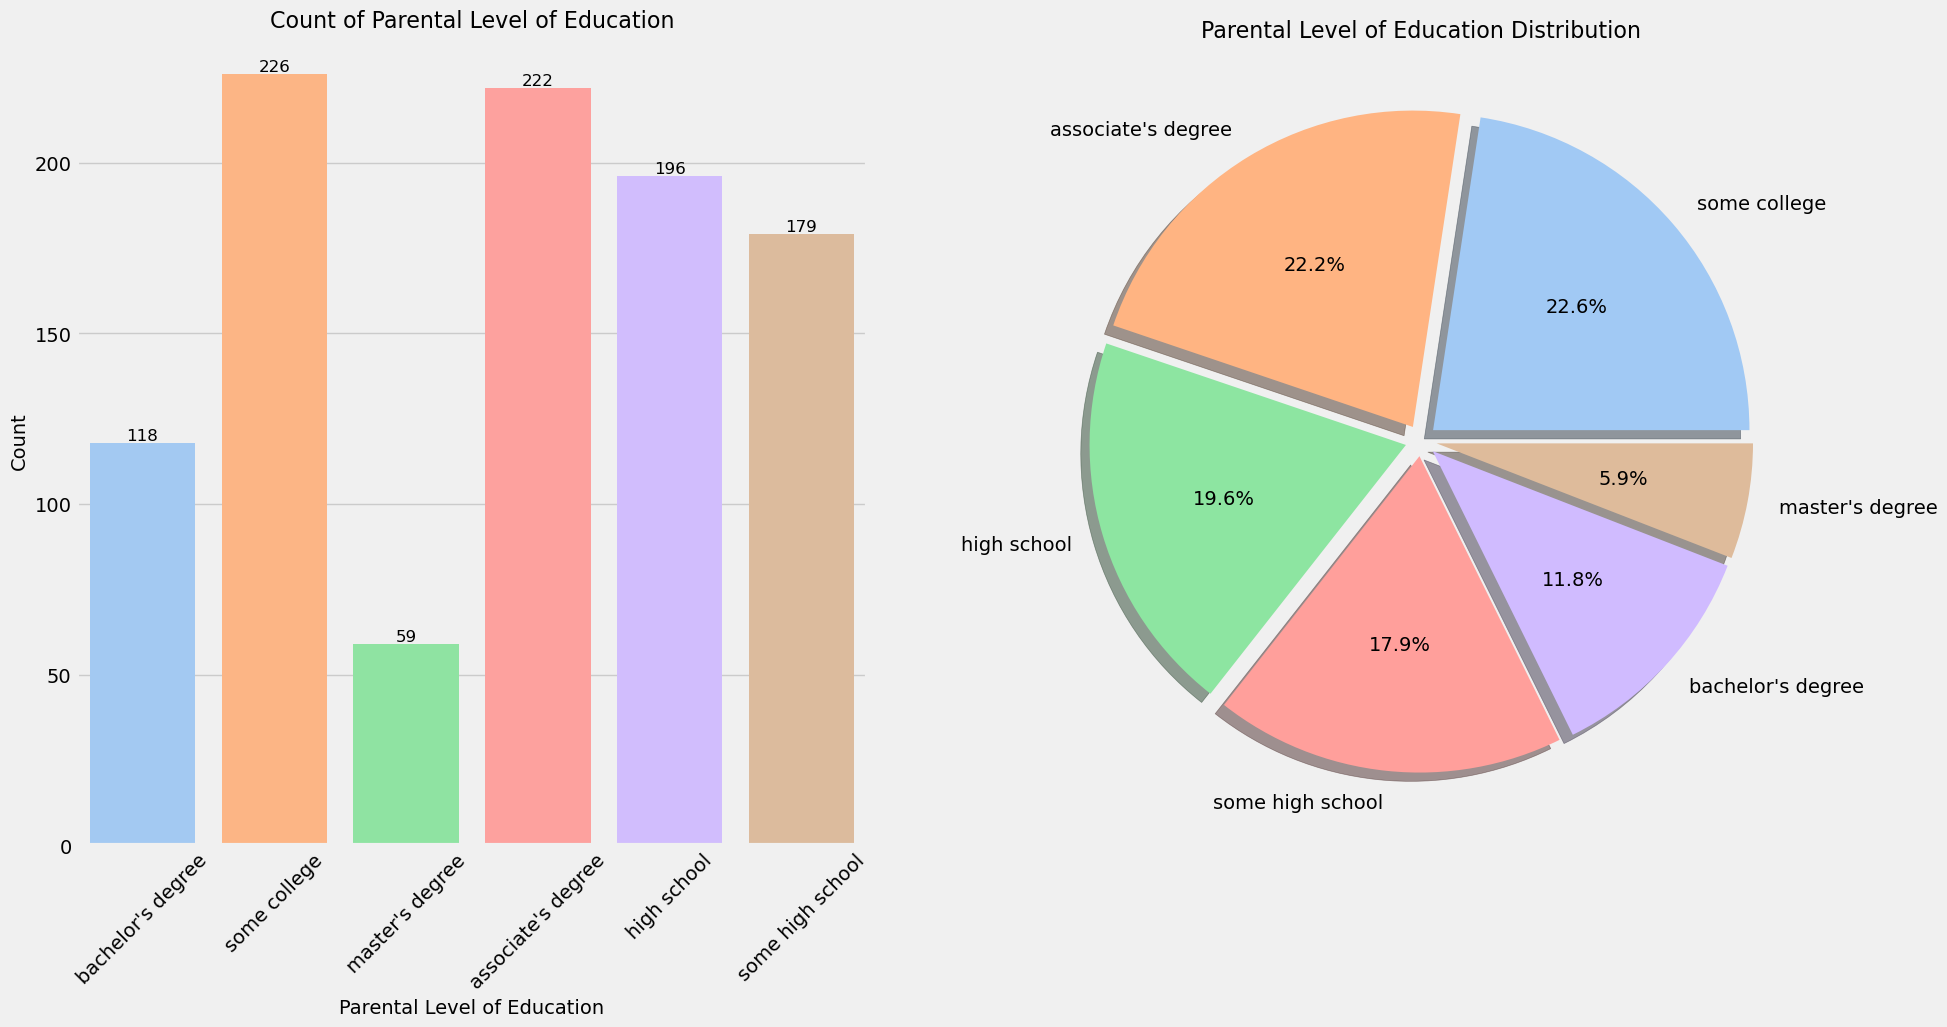

In [49]:
# Univariate Analysis - Parental Level of Education
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot
sns.countplot(x=df['parental level of education'], palette='pastel', ax=ax[0], saturation=0.95)
ax[0].set_title('Count of Parental Level of Education', fontsize=16)
ax[0].set_xlabel('Parental Level of Education', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, size=12)

# Pie chart
plt.pie(
    x=df['parental level of education'].value_counts(),
    labels=df['parental level of education'].value_counts().index,
    autopct='%1.1f%%',
    explode=[0.05] * len(df['parental level of education'].value_counts()),
    colors=sns.color_palette('pastel'),
    shadow=True
)
plt.title('Parental Level of Education Distribution', fontsize=16)
plt.show()


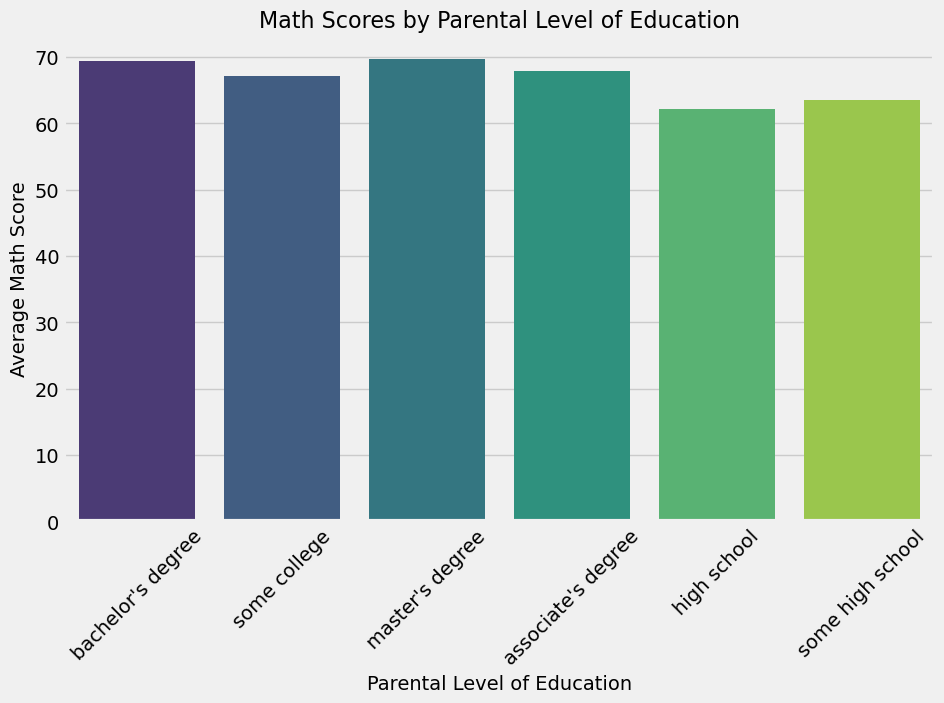

In [51]:
# Bivariate Analysis - Parental Level of Education vs Scores
plt.figure(figsize=(10, 6))
sns.barplot(
    x='parental level of education',
    y='math score',
    data=df,
    palette='viridis',
    ci=None
)
plt.title('Math Scores by Parental Level of Education', fontsize=16)
plt.xlabel('Parental Level of Education', fontsize=14)
plt.ylabel('Average Math Score', fontsize=14)
plt.xticks(rotation=45)
plt.show()


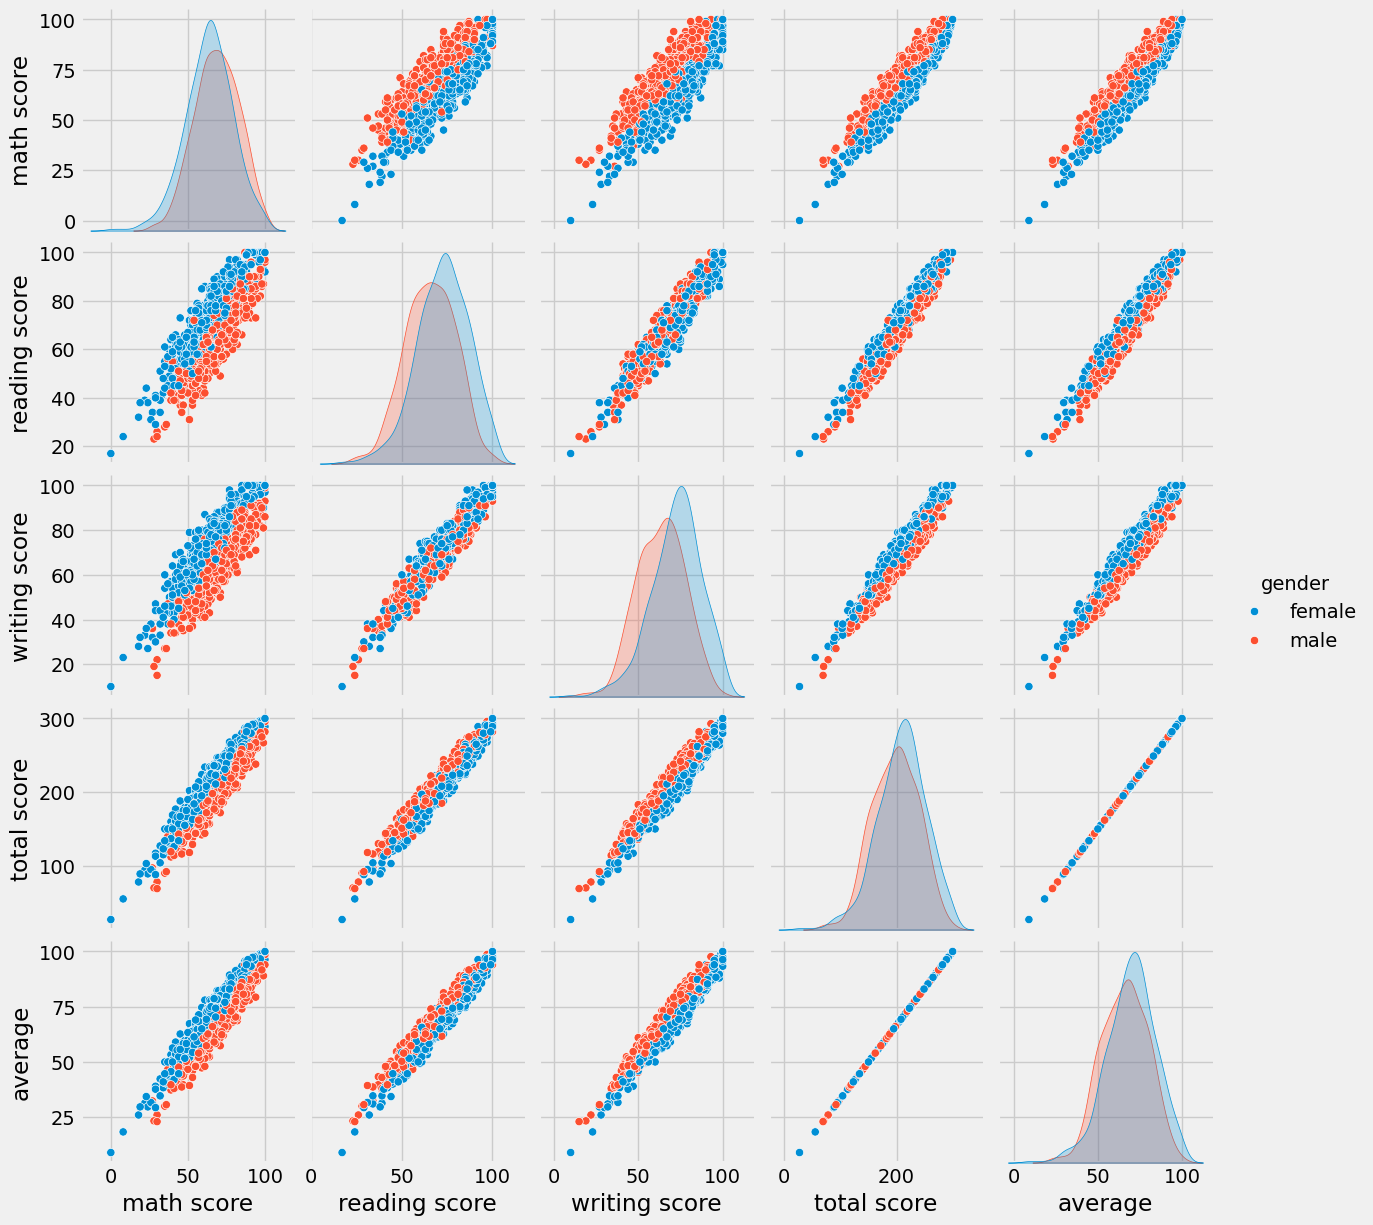

In [52]:
sns.pairplot(df,hue='gender')
plt.show()

In [53]:
# Conclusions

'''
Students performance is related with lunch, race , parental level education
Females lead in pass percentage and also top scorers
Students performance is not much related with test preparation course
Finishing preparation course is beneficial

'''

'\nStudents performance is related with lunch, race , parental level education\nFemales lead in pass percentage and also top scorers\nStudents performance is not much related with test preparation course\nFinishing preparation course is beneficial\n\n'